# Imports

In [1]:
import os

from verification_system import VerificationSystem

# Testing Single Users

In [2]:
verification_system = VerificationSystem(
    database_path=os.path.join("data", "database"),
)

24-04-08 19:15:11 - Searching data\database\incoming_users\authorized_users\1\000023.jpg in 1826 length datastore
24-04-08 19:15:11 - find function duration 1.4930596351623535 seconds


### Previously verified user

In [3]:
verification_system.verify_user(
    user_name="1",
    user_photo_path=verification_system.get_incoming_authorized_user_path(),
)

(True,
 0     0.293093
 1     0.295183
 2     0.297444
 3     0.300314
 4     0.351859
 5     0.353639
 6     0.414569
 7     0.417402
 8     0.457039
 9     0.457253
 10    0.464103
 11    0.495625
 12    0.496436
 13    0.499595
 Name: distance, dtype: float64)

### Not authorized user

In [4]:
verification_system.verify_user(
    user_name="101",
    user_photo_path=verification_system.get_incoming_unauthorized_user_path(),
)

(False, inf)

### No face detected or above acceptance threshold

In [5]:
verification_system.verify_user(
    user_name="22",
    user_photo_path=verification_system.get_problematic_incoming_authorized_user_path(),
)

(False,
 0      0.013562
 1      0.016151
 2      0.017090
 3      0.017446
 4      0.018064
          ...   
 148    0.337964
 149    0.366994
 150    0.393984
 151    0.472677
 152    0.496448
 Name: distance, Length: 153, dtype: float64)

# Testing Multiple Users

### Incoming Authorized Users

In [ ]:
df_incoming_authorized_users = verification_system.verify_multiple_users(
    incoming_users_path=os.path.join(
        "data", "database", "incoming_users", "authorized_users"
    ),
)

In [7]:
df_incoming_authorized_users.head()

,image_path,is_access_granted,distance
0,data\database\incoming_users\authorized_users\...,True,0.356046
1,data\database\incoming_users\authorized_users\...,True,0.015747
2,data\database\incoming_users\authorized_users\...,False,0.012182
3,data\database\incoming_users\authorized_users\...,True,0.293093
4,data\database\incoming_users\authorized_users\...,False,0.012555


In [8]:
verification_system.calculate_access_granted_rate(df_users=df_incoming_authorized_users)

0.8743718592964824

### Incoming Unauthorized Users

In [ ]:
df_incoming_unauthorized_users = verification_system.verify_multiple_users(
    incoming_users_path=os.path.join(
        "data", "database", "incoming_users", "unauthorized_users"
    ),
)

In [10]:
df_incoming_unauthorized_users.head()

,image_path,is_access_granted,distance
0,data\database\incoming_users\unauthorized_user...,False,inf
1,data\database\incoming_users\unauthorized_user...,False,inf
2,data\database\incoming_users\unauthorized_user...,False,inf
3,data\database\incoming_users\unauthorized_user...,False,inf
4,data\database\incoming_users\unauthorized_user...,False,inf


In [11]:
verification_system.calculate_access_granted_rate(
    df_users=df_incoming_unauthorized_users
)

0.0

# Additional Metrics

## Calculate FRR and FRR

In [12]:
far, frr = verification_system.calculate_far_frr(
    df_users_authorized=df_incoming_authorized_users,
    df_users_unauthorized=df_incoming_unauthorized_users,
)
print(f"FAR == {far}, FRR == {frr}")

FAR == 0.12562814070351758, FRR == 0.0


## Plot ROC curve

(214, 0, 25, 174)

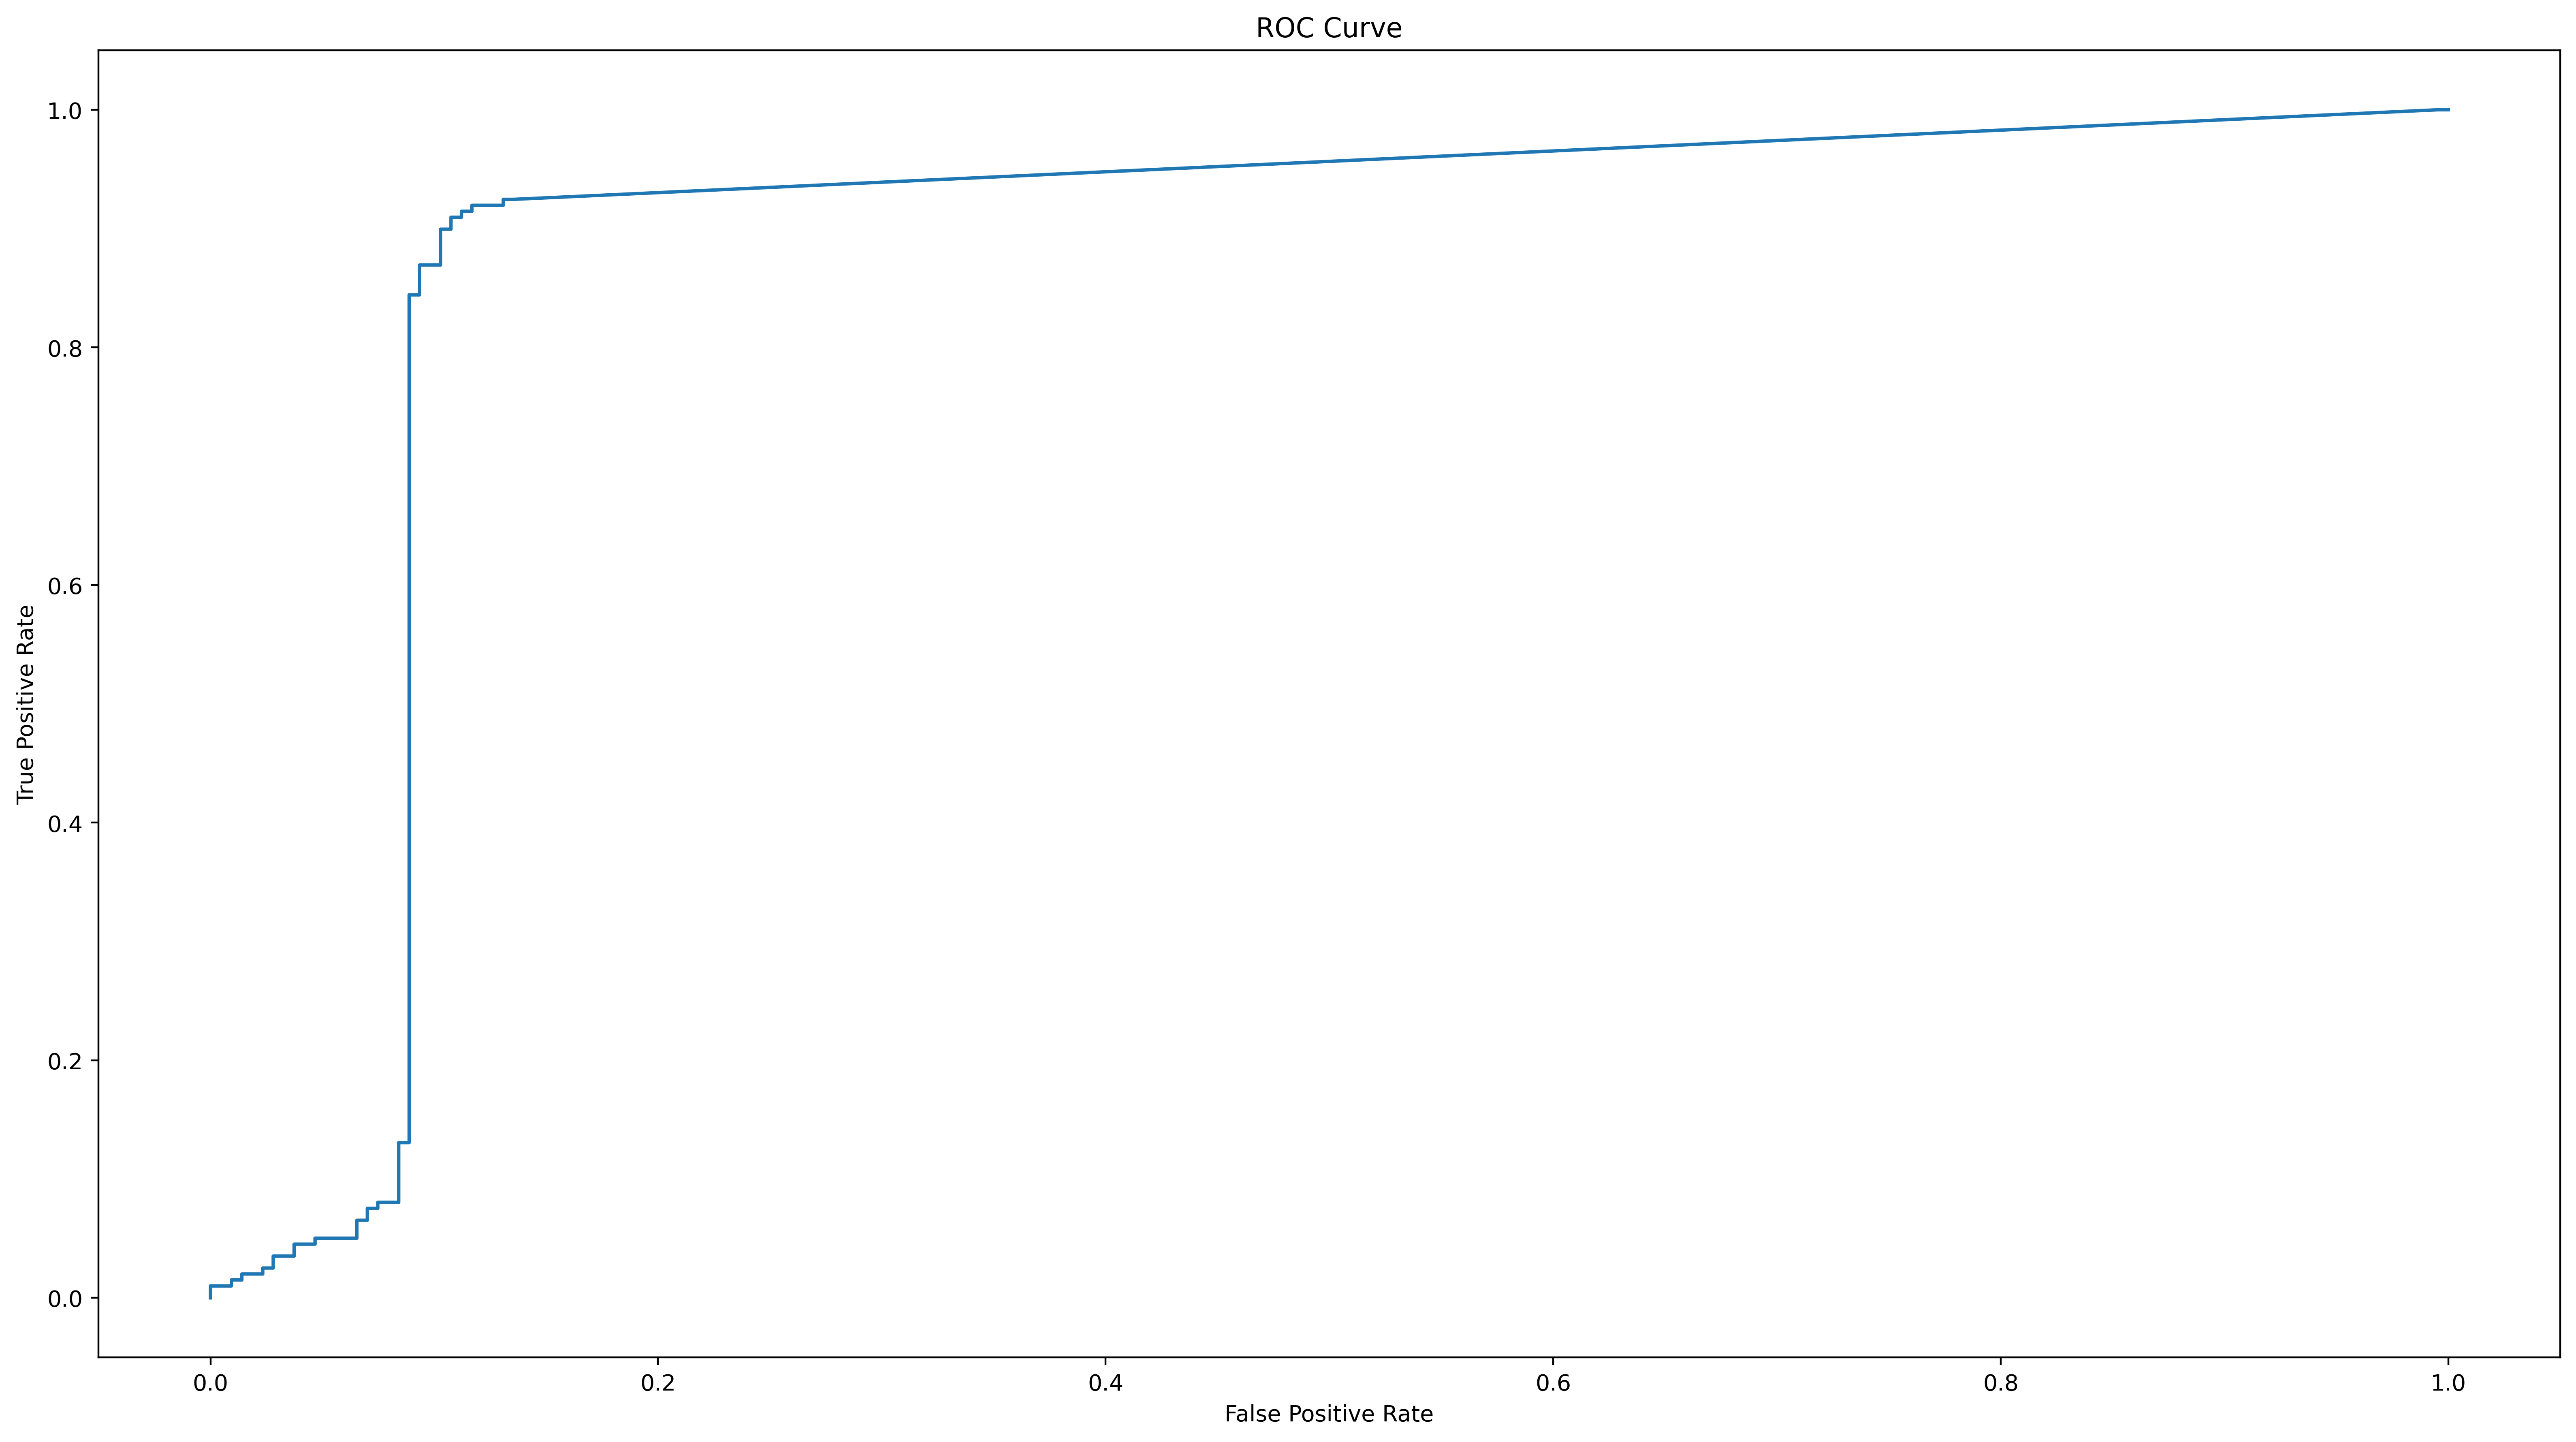

In [14]:
verification_system.calculate_ROC_curve(
    df_users_authorized=df_incoming_authorized_users,
    df_users_unauthorized=df_incoming_unauthorized_users,
    roc_curve_path=os.path.join("data", "results", "roc_curve", "roc_curve.png"),
)